In [6]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load Fashion MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values (between 0 and 1)
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Split the full training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

# Reshape data for CNN input
X_train = X_train[..., tf.newaxis]
X_val = X_val[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

# One-hot encode labels (for categorical classification)
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


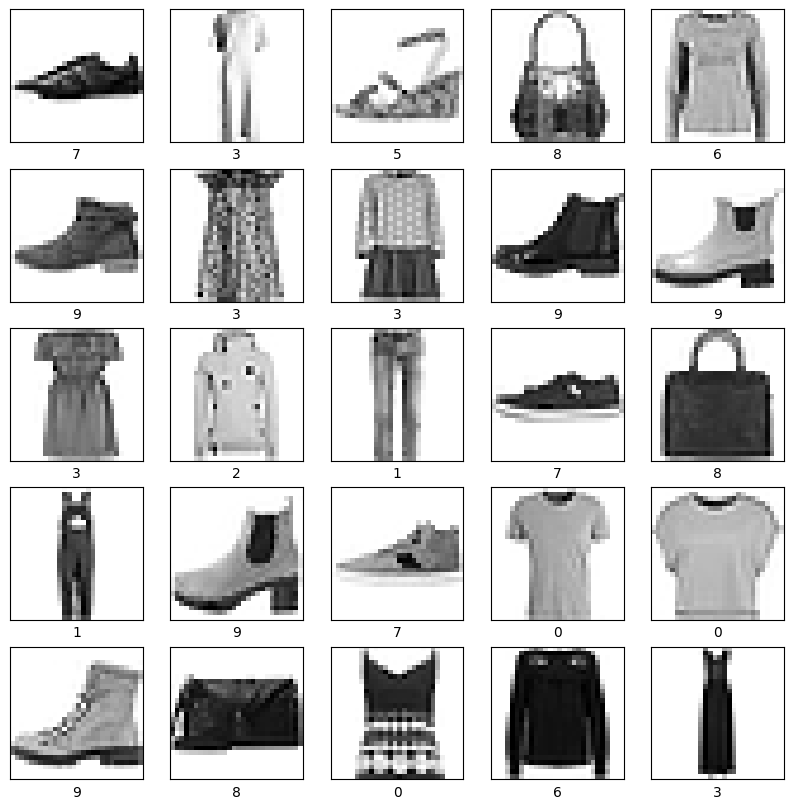

In [7]:
#visualize the data set
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),  # Add Batch Normalization
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),  # Add Batch Normalization
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.6),  # Increased dropout rate

    Dense(10, activation='softmax')
])

# Display the model architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.7221 - loss: 0.8318 - val_accuracy: 0.8595 - val_loss: 0.3706
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.8441 - loss: 0.4368 - val_accuracy: 0.8855 - val_loss: 0.3122
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.8643 - loss: 0.3672 - val_accuracy: 0.8895 - val_loss: 0.2952
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.8792 - loss: 0.3375 - val_accuracy: 0.8950 - val_loss: 0.2862
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.8885 - loss: 0.3068 - val_accuracy: 0.8992 - val_loss: 0.2775
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.8947 - loss: 0.2882 - val_accuracy: 0.9081 - val_loss: 0.2535
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9019 - loss: 0.2648 - val_accuracy: 0.8363 - val_loss: 0.5030
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9064 -

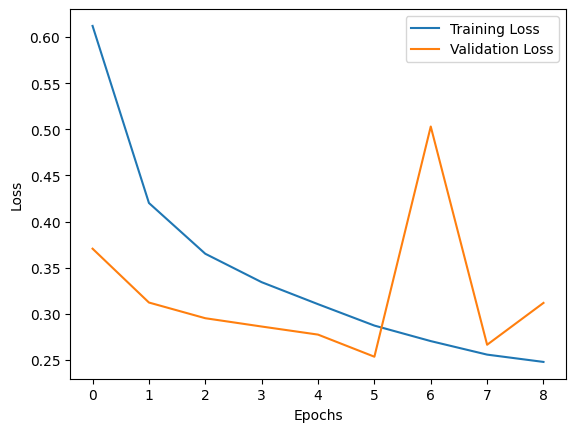

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10, width_shift_range=0.1, height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the generator on training data
datagen.fit(X_train)


history = model.fit(
    X_train, y_train, epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    batch_size=32
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict the labels for the test data
y_pred = model.predict(X_test).argmax(axis=1)

# Generate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 90.25%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Confusion Matrix:
 [[813   2  21  17   5   1 138   0   3   0]
 [  0 976   0  17   2   0   2   0   3   0]
 [  7   0 858   9  79   0  47   0   0   0]
 [ 10   3  12 909  33   0  33   0   0   0]
 [  1   1  38  27 889   0  44   0   0   0]
 [  0   0   0   0   0 986   0  10   0   4]
 [ 74   1  81  28 113   0 688   0  15   0]
 [  0   0   0   0   0  17   0 968   0  15]
 [  0   1   7   3   7   3   3   0 976   0]
 [  0   0   0   0   0   5   0  33   0 962]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.86      0.85      1000
           3       0.90      0.91      0.90      1000
           4       0.79      0.89      0.84      1000
           5       0.97      0.99      0.98      1000
           6       0.72      0.69      0.70      1000
           7       0.96      

In [12]:
# learning_rates = [0.0001, 0.001, 0.01, 0.1]
# histories = []

# for lr in learning_rates:
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
#                   loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#     history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=0)
#     histories.append(history)

# # Plot loss for different learning rates
# plt.figure(figsize=(10, 5))
# for i, lr in enumerate(learning_rates):
#     plt.plot(histories[i].history['val_loss'], label=f'LR = {lr}')
# plt.xlabel('Epochs')
# plt.ylabel('Validation Loss')
# plt.legend()
# plt.show()


## 02. Compareyournetwork with state-of-the-art networks

Choose the resNet50V2 architecture first as the pre-trained model

In [13]:
%pip install tensorflow
from tensorflow.keras.applications import ResNet50V2

base_model = ResNet50V2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False # Freeze the base model

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\ANUSHKA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 129s 1us/step


In [16]:
#model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])      

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,828,362 (90.90 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [ ]:
X_train = tf.image.resize(X_train, (224, 224))
X_train = tf.image.grayscale_to_rgb(X_train)
X_test = tf.image.resize(X_test, (224, 224))
X_test = tf.image.grayscale_to_rgb(X_test)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)


KeyboardInterrupt: 